In [4]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import numpy as np

# Bayesian Example

**Problem: ** 
*I have a coin but you don't know whether it is fair or not. I throw it 10 times and it lands on HEADS each time. What is the probability of observing a HEADS on the 11th throw?*

This problem is subtle and outlines the different approaches a Frequentist and a Bayesian statistician would take. One should start by reformulating the question as "*Estimate the parameter p of the Bernouilli distribution (the probability that the coin lands on HEADS)*".

The frequentist approach would be to come up with an estimator of p, for example the Maximum Likelihood Estimator:

$$ p_{MLE} = \frac{1}{n}\sum_i{x_i} $$

In this case you would get a probability of 1 to land on HEADS.

The Bayesian statistician would consider p as a Random Variable instead of an unknown, and assign a prior distribution $\pi(p)$ on this random variable. He would then compute the posterior distribution from the observations by using Bayes Formula:

$$f(p|x) \propto P(X=x|p)\cdot\pi(p)$$

But which prior distribution should we select? In this case, given we have no information on the coin, it makes sense to start with the uniform probability distribution over [0,1]

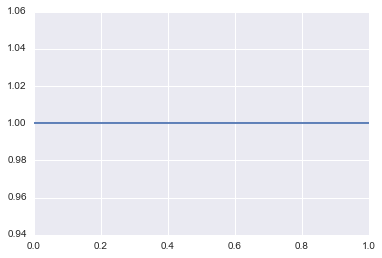

In [24]:
pi = np.vectorize(lambda x:1)
x = np.linspace(0,1,100)
ax = plt.plot(x,pi(x))

Now we update the distribution with the first observation:

$$ f(p|x) \propto p\cdot\pi(p) = p $$

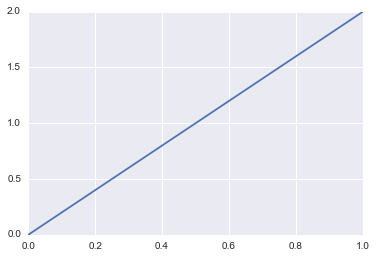

In [25]:
pi = np.vectorize(lambda x:2*x)
x = np.linspace(0,1,100)
ax = plt.plot(x,pi(x))

Second observation:
$$ f(p|x) \propto p^2$$

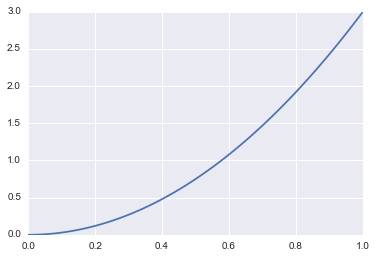

In [26]:
pi = np.vectorize(lambda x:3*x**2)
x = np.linspace(0,1,100)
ax = plt.plot(x,pi(x))

Tenth observation:
$$ f(p|x) \propto p^{10} $$

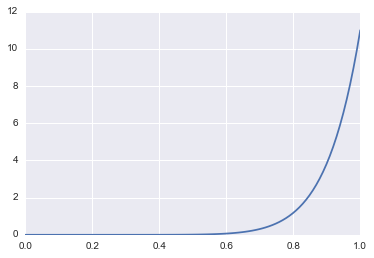

In [27]:
pi = np.vectorize(lambda x:11*x**10)
x = np.linspace(0,1,100)
ax = plt.plot(x,pi(x))

Now that we know the posterior distribution of p, we need to select a value of p that we will use to answer the problem. We can for example select the Expectation of p according to the posterior distribution. Other possibilities are the median and the mode.

$$ E[p|X] = \int{p \cdot f(p|x) \cdot dp} = \int{11 \cdot p^{11}\cdot dp} = \frac{11}{12} \approx 0.917$$

Now for the sake of the argument let's say that the 11th observation is a TAILS. How do we update our distribution? The new formula is as follows:

$$ f(p|x) \propto p^{10}(1-p) $$

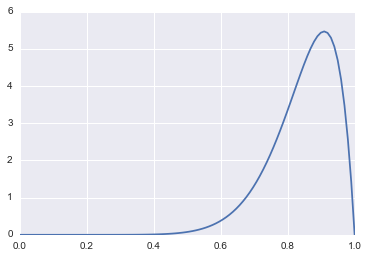

In [29]:
pi = np.vectorize(lambda x:12*13*x**10*(1-x))
x = np.linspace(0,1,100)
ax = plt.plot(x,pi(x))